# Emergence of Communication in a Multi-Step, Multi-Modal Referential Game

This data, configuration, and results are not representative to what is discussed in the paper. Rather, it is used as a demonstration for how to use the provided code and analyse the log files.

## Communication Analysis

In [1]:
# Load packages
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy
import h5py

from sklearn.decomposition import PCA

import imp
misc = imp.load_source('misc', './misc.py')
read_data = misc.read_data

# Load Descriptions

In [2]:
descriptions_file = "./utils/descriptions.csv"
descr, word_dict, dict_size, label_id_to_idx, index_to_name = read_data(descriptions_file)
name_to_index = dict([(vv, kk) for kk, vv in index_to_name.items()])
print index_to_name

{0: 'agama', 1: 'bullfrog', 2: 'centipede', 3: 'chickadee', 4: 'drake', 5: 'goldfinch', 6: 'goose', 7: 'hen', 8: 'hummingbird', 9: 'jacamar', 10: 'jay', 11: 'jellyfish', 12: 'koala', 13: 'lorikeet', 14: 'macaw', 15: 'magpie', 16: 'ostrich', 17: 'partridge', 18: 'peacock', 19: 'quail', 20: 'robin', 21: 'scorpion', 22: 'slug', 23: 'snail', 24: 'stingray', 25: 'tarantula', 26: 'terrapin', 27: 'triceratops', 28: 'trilobite', 29: 'vulture'}


# Load Binary Vectors and Predictions

In [3]:
# Function loading binary file
def load_binary_file(file_path):
    # Read file
    f = h5py.File(file_path, "r")
    binary_vectors = f["Communication"]
    predictions = f["Predictions"]
    return binary_vectors, predictions 

In [4]:
# Loading Binary Vectors
binary_vectors_file = "./logs/demo.bv.hdf5"
binary_vectors, predictions = load_binary_file(binary_vectors_file)

In [5]:
# Exchange indexes to keep
adaptive_length_indexes = predictions['StopMask'].reshape(-1) == 1

In [6]:
# Sender's communications
sender_vectors = binary_vectors[binary_vectors['AgentId'] == 'S']
sender_vectors_adaptive = sender_vectors[adaptive_length_indexes]
print len(sender_vectors), len(sender_vectors_adaptive)

29710 2972


In [7]:
# Receiver's communications
receiver_vectors = binary_vectors[binary_vectors['AgentId'] == 'R']
receiver_vectors_adaptive = receiver_vectors[adaptive_length_indexes]
print len(receiver_vectors), len(receiver_vectors_adaptive)

29710 2972


# Average Conversation Length by Category

In [8]:
animal_categories = set(sender_vectors_adaptive['Target'])
for category in animal_categories:
    image_ids = set(sender_vectors_adaptive[sender_vectors_adaptive['Target'] == category]['ExampleId'])
    conversation_lengths = []
    for image in image_ids:
        binary_vectors = sender_vectors_adaptive[(sender_vectors_adaptive['Target'] == category) & 
                                                 (sender_vectors_adaptive['ExampleId'] == image)]['BinaryVec']
        conversation_lengths.append(len(binary_vectors))
    print "{} {}".format(index_to_name[category], numpy.mean(conversation_lengths))

agama 1.0
bullfrog 1.0
centipede 1.0
chickadee 1.0
drake 1.03
goldfinch 1.0
goose 1.0
hen 1.0
hummingbird 1.0
jacamar 1.0
jay 1.0
jellyfish 1.0
koala 1.0
lorikeet 1.0
macaw 1.0
magpie 1.0
ostrich 1.0
partridge 1.0
peacock 1.0
quail 1.0
robin 1.0
scorpion 1.0
slug 1.01030927835
snail 1.0
stingray 1.0
tarantula 1.0
terrapin 1.0
triceratops 1.0
trilobite 1.0
vulture 1.0


# PCA 

<IPython.core.display.Javascript object>


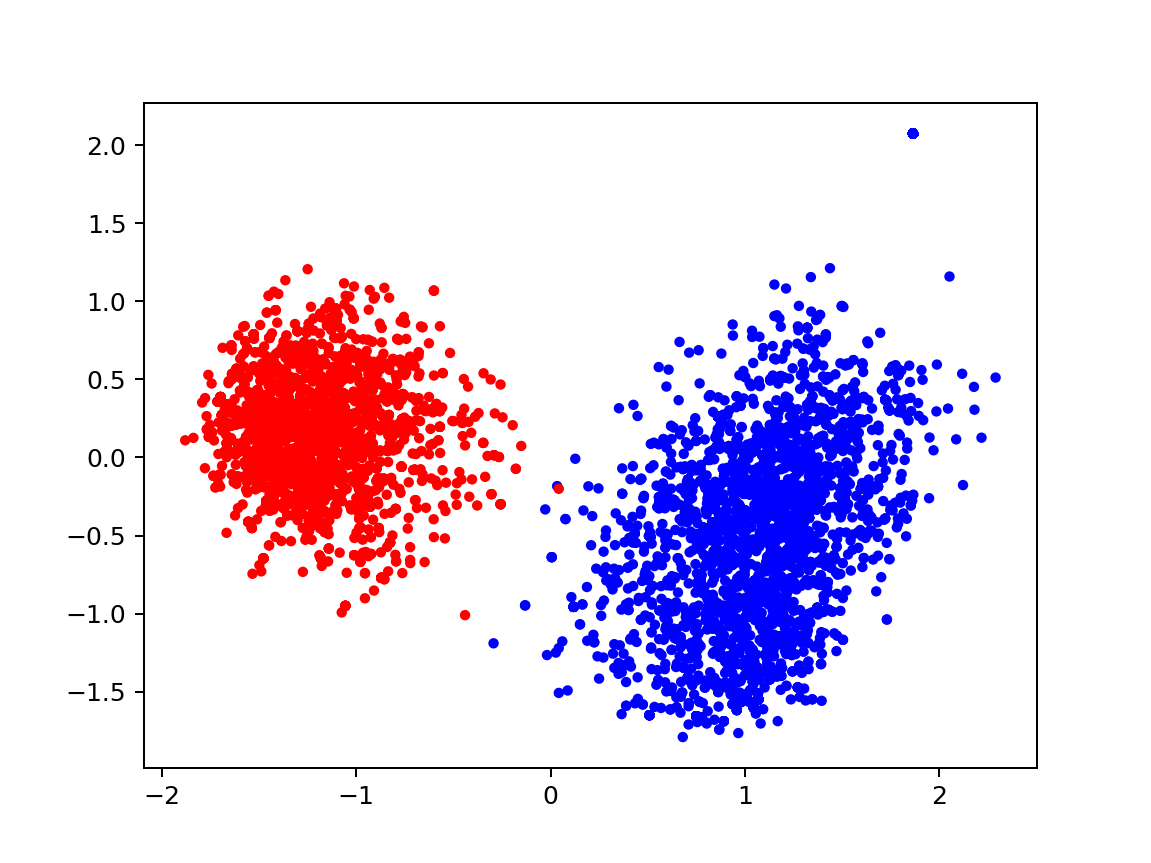

In [9]:
# Append binary vectors and targets
binary_vectors = numpy.append(sender_vectors_adaptive["BinaryVec"], 
                              receiver_vectors_adaptive["BinaryVec"], axis = 0)
agents_ids = numpy.append(numpy.array(["b"]*sender_vectors_adaptive.shape[0]), 
                      numpy.array(["r"]*receiver_vectors_adaptive.shape[0]), axis = 0)

# PCA Model
model = PCA(n_components=2)
pca_vecs = model.fit_transform(binary_vectors)

# Plot binary vectors after PCA transformation
plt.figure()
plt.scatter(pca_vecs[:,0], pca_vecs[:,1], c=agents_ids, s=10)